# Séries temporelles

Collection de données observées à intervalle de temps successive

### Analyse d'une série temporelle

Décrit une série temporelle demande à observer 4 choses:
<br><br>La tendance : L'évolution globale à long terme(croissante | décroissante | constante)
<br><br>La saisonnalité: Sur une période donnée la série temporelle se comporte toujours de façon identique par exemple sur tous les 1er du mois, chauqe été, ...
<br><br>Les cycles :  répétition de phenomènes apres une intervalle donnée
<br><br>Les bruits

#### Notion de stationnarité

Dans le temps les caractéristiques principales(la moyenne, la variance et en structure) de la série ne change jamais

Toujours se poser la question est ce que ma série est stationnaire ?

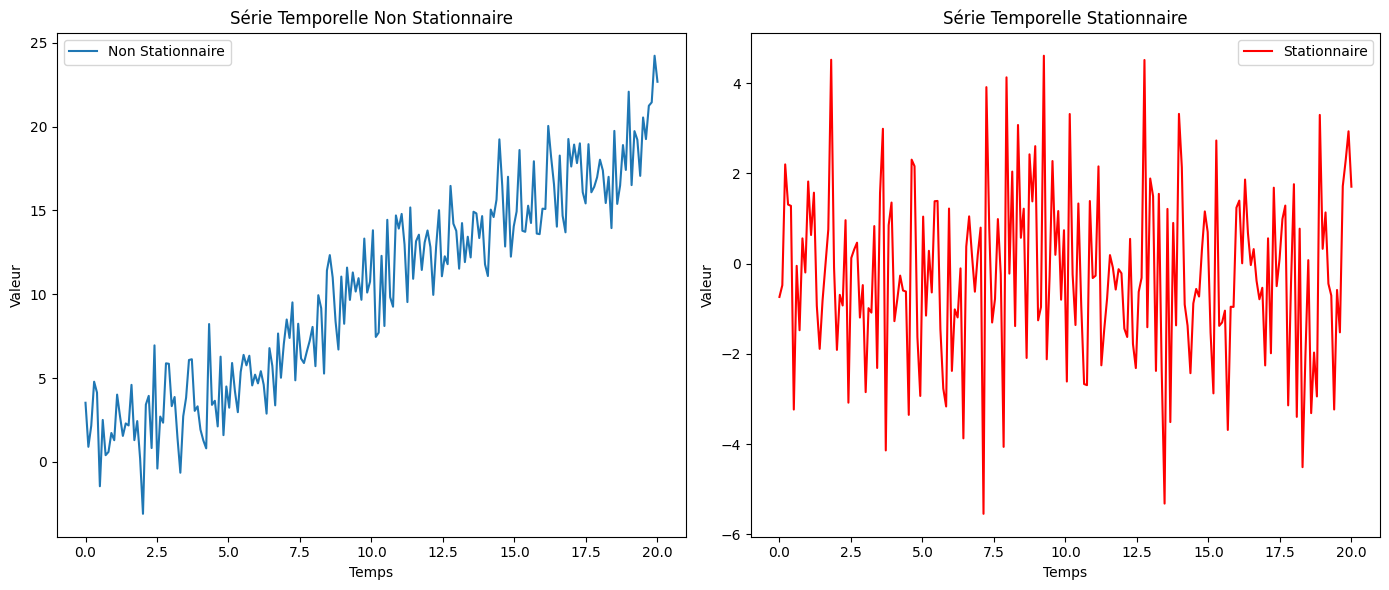

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Générer des données
np.random.seed(0)
n_points = 200
x = np.linspace(0, 20, n_points)

# Série temporelle non stationnaire : tendance + bruit
non_stationary_series = x + np.random.normal(0, 2, n_points)

# Série temporelle stationnaire : seulement du bruit
stationary_series = np.random.normal(0, 2, n_points)

# Affichage
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x, non_stationary_series, label="Non Stationnaire")
plt.title("Série Temporelle Non Stationnaire")
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, stationary_series, label="Stationnaire", color="r")
plt.title("Série Temporelle Stationnaire")
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.legend()

plt.tight_layout()
plt.show()


Importance d'une série stationnaire:
Elle simplifie l'analyse des séries temporelles en utilisant les methodes statiques classiques
<br>Elle permet de prévoir et modéliser plus éfficacement les valeurs futures de la série temporelle
<br>Elle facilite l'identification des relations de la causalitéentre les variables

#### Types de stationnarité

Trend stationnary (TS) : 
<br>.Moyenne et variance constantes sur toutes la période
<br>.Présence d'une tendance prévisible et régulière
<br>.Methode analyse statistique pplicables

Difference stationnary (DS) :
<br>.Obtenu en différenciant une série temporelle non stationnaire
<br>.Moyenne et variance constantes après différenciation
<br>.Elimine la tendance pour faciliter l'analyse et la prévision

#### Vérifier la stationnarité

Examen visuel:
<br>Tracer la série temporelle et évaluer si elle présente des variations de moyenne, de variance, de structure au fil du temps
<br>Rechercher des tendances, des cycles, ou des motifs non aléatoires

<br><br>
Tests statitiques:
<br>Utiliser les tests statistiques pour évaluer la présence de stationnarité
<br>Test de Dickey-Fuller augmenté (ADF) l'un des test les plus utilisé
<br>L'hypothèse null du test st que la série n'est pas stationnaire
<br>Si la valeur p du test est inférieur à un seuil pré-défini, nous rejetons l'hypothèse nulle et concluons que le série est stationnaire

#### Comment traiter l'absence de stationnairité

Dfférenciation:
<br>Permet de calculer la différence entre les observations successive pour éliminer la tendance
<br>Formule de différenciation: diff_t = observation_t - observation_(t-1)
<br> Appliquer la différenciation d'orde 1 ou d'ordre supérieur si nécessaire
<br><br>
Decoupage de la tendance:
<br>Supprimer la tendance en utilisant les méthodes de lissage
<br>Moyenne Mobile ou Moyenne mobile exponentielle (EMA)
<br><br>
Transformation logarithmique:
<br>Prendre le logarithme des observations pour stabiliser la variance
<br>Utile lorsque la série présente une croissance exponentielle

#### Méthodes de modélisation des séries temporelles

Modèle ARMA
<br> Modèle ARIMA
<br>Modèle SARIMA

### Modèle ARIMA (Auto-Regressive Integrated Moving AVerage)

#### Composants du modèle:
<br><br> AR(Auto-Regressive) : L'AR Fait référence à la régression linéaire des valeurs actuelles sur les valeurs précédentes de la série temporelle. Il capture les effets de dépendance linéaire à partir des valeurs passées.
<br><br> MA (Moyenne mobile) : Le MA utilise la moyenne mobile des erreurs précédentes pour modéliser la relation entre les résidus et les observations actuelles de la série temporelle. Il capture les effets de dépendance entre les résidus. 
<br><br> I (Différenciation) : La différenciation est utilisée pour rendre les données stationnaires en supprimant les tendances et les comportements saisonniers. Elle consiste à prendre la différence entre les observations consécutives jusqu'à obtenir une série stationnaire.

#### Ordres du modèle ARIMA

Le modèle ARIMA est défini par trois ordres : p, d et q.

<br><br>p (Ordre AR) : L'ordre AR spécifie le nombre de termes autorégressifs à inclure dans le modèle. Il indique combien de valeurs passées sont utilisées pour prédire la valeur actuelle.
<br><br>d (Ordre de différenciation) : L'ordre de différenciation indique combien de fois la série doit être différenciée pour rendre les données stationnaires.
<br><br>q (Ordre MA) : L'ordre MA spécifie le nombre de termes de la moyenne mobile à inclure dans le modèle. Il indique combien de résidus passés sont utilisés pour prédire l'observation actuelle.

#### Méthodologie de Box-Jenkins le modèle ARIMA


La méthodologie de Box-Jenkins est une approche couramment utilisée pour modéliser et prévoir les séries temporelles. <br>Elle comprend les étapes suivantes :

<br><br><b>Identification du modèle</b>

<br><br>Analyse des données : Examiner les données de la série temporelle pour détecter les tendances, les saisonnalités et les comportements anormaux.
<br>Différenciation : Si la série temporelle présente une tendance ou une saisonnalité, appliquer une différenciation pour rendre les données stationnaires.
<br>Identification des ordres : Utiliser les graphiques ACF (fonction d'autocorrélation) et PACF (fonction d'autocorrélation partielle) pour déterminer les ordres p, d et q du modèle ARIMA.

<br><br><b>Estimation du modèle</b>

<br>Estimation des paramètres : Utiliser les méthodes d'estimation (telles que la méthode des moindres carrés) pour estimer les paramètres du modèle ARIMA.

<br><br><b>Vérification du modèle</b>

<br>Diagnostic du modèle : Vérifier si les résidus du modèle ARIMA sont bruit blanc (c'est-à-dire s'ils ne présentent pas de structure ou de corrélation significative).
<br>Réajustement : Si le modèle ne satisfait pas les critères de bruit blanc, ajuster les ordres du modèle ARIMA et répéter les étapes précédentes.
<br>Validation : Valider les performances du modèle en effectuant des prédictions sur des données de validation ou en utilisant des mesures d'évaluation telles que l'erreur quadratique moyenne (RMSE) ou le critère d'information d'Akaike (AIC).
<br><br>La méthodologie de Box-Jenkins est itérative, ce qui signifie que les étapes d'identification, d'estimation et de vérification peuvent être répétées plusieurs fois pour améliorer le modèle. L'objectif est de trouver le meilleur modèle ARIMA qui capture les motifs et les caractéristiques importantes de la série temporelle, et qui peut être utilisé pour effectuer des prédictions précises.

#### Importation des packages

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA